In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

## Edit title

In [79]:
cancer_data = pd.read_excel('../../data/cancer_data.xls')
cancer_info = pd.read_excel('../../data/cancer_info.xlsx')

title_dic = cancer_info.groupby('变量名')['变量名缩写'].apply(list).to_dict()
for k, v in title_dic.items():
    cancer_data.rename(columns={k:v[0]}, inplace=True)
cancer_data.replace('UN', np.nan, inplace=True)

cancer_data.to_csv('../../data/cancer_data.csv', index=False)

## Process outlier

In [121]:
cancer_data = pd.read_csv('../../data/cancer_data.csv')
for i in cancer_data.columns:
    cancer_data[i] = cancer_data[i].apply(lambda x: np.nan if isinstance(x, str) and x[0] in ['>','<'] else x)

C:\Users\Chi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (5,6,34,50,66,68,69,70,71,72) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [106]:
cancer_data.columns

Index(['ID', 'A=Case, B=Control', 'Origin', 'A=male B=female', 'Age',
       'Pattern', 'TNM', 'Smoke', 'RBC', 'HGB', 'HCT', 'MCV ', 'MCH', 'MCHC ',
       'RDW-CV', 'RDW-SD', 'PLT', 'PCT', 'MPV', 'P-LCR', 'PDW', 'WBC', 'NEUT%',
       'LYM%', 'MONO%', 'EO%', 'BASO%', 'AC%', 'NEUT', 'LYMPH', 'MONO', 'EO',
       'BASO', 'TBIL', 'DBIL', 'IBIL', 'ALT', 'AST', 'AST:ALT', 'TP', 'ALB',
       'GLO', 'A/G', 'GLU', 'BUN', 'Cr', 'Cystatin-C', 'UA', 'TG', 'TCH',
       'HDL-C', 'LDL-C', 'ALP', 'GGT', 'CK', 'LDH-L', 'HBDH', 'Na', 'K', 'Cl',
       'CO2Cp', 'AG', 'Beta-HB', 'Ca', 'Mg', 'P', 'T-CEA', 'T-CA199',
       'T-CA125', 'T-CYFRA21-1', 'T-NSE', 'T-ESR', 'T-CRP'],
      dtype='object')

In [126]:
for i in ['Age', 'Smoke', 'RBC', 'HGB', 'HCT', 'MCV ', 'MCH', 'MCHC ',
       'RDW-CV', 'RDW-SD', 'PLT', 'PCT', 'MPV', 'P-LCR', 'PDW', 'WBC', 'NEUT%',
       'LYM%', 'MONO%', 'EO%', 'BASO%', 'AC%', 'NEUT', 'LYMPH', 'MONO', 'EO',
       'BASO', 'TBIL', 'DBIL', 'IBIL', 'ALT', 'AST', 'AST:ALT', 'TP', 'ALB',
       'GLO', 'A/G', 'GLU', 'BUN', 'Cr', 'Cystatin-C', 'UA', 'TG', 'TCH',
       'HDL-C', 'LDL-C', 'ALP', 'GGT', 'CK', 'LDH-L', 'HBDH', 'Na', 'K', 'Cl',
       'CO2Cp', 'AG', 'Beta-HB', 'Ca', 'Mg', 'P', 'T-CEA', 'T-CA199',
       'T-CA125', 'T-CYFRA21-1', 'T-NSE', 'T-ESR', 'T-CRP']:
    cancer_data[i] = cancer_data[i].astype('float')

In [127]:
cancer_data.to_csv('../../data/cancer_data_v2.csv', index=False)

## File description: change the data type as float.

In [26]:
cancer_data2 = pd.read_csv('../../data/cancer_data_v2.csv').set_index('ID', drop=True).sort_index()

/home/chi/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


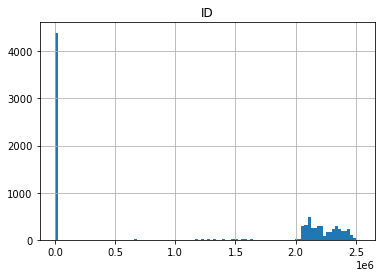

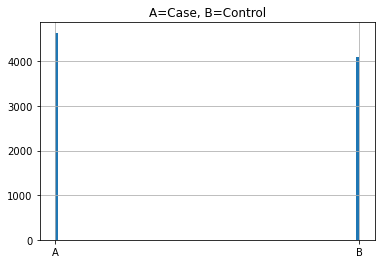

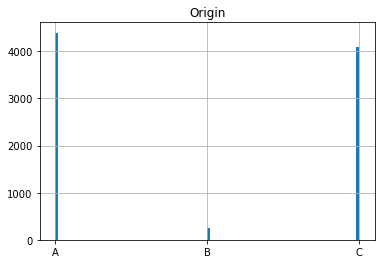

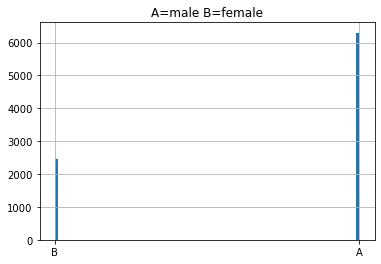

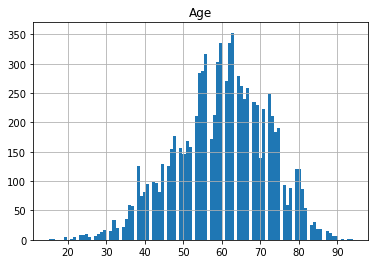

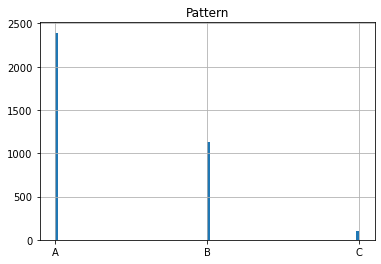

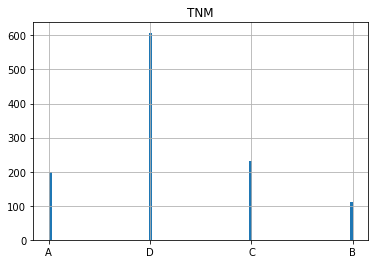

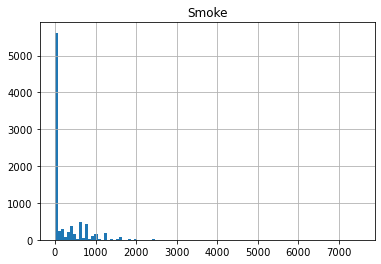

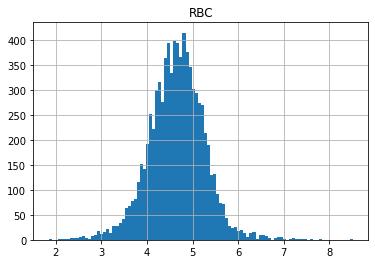

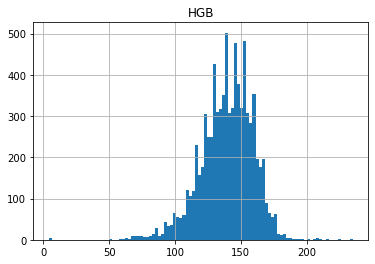

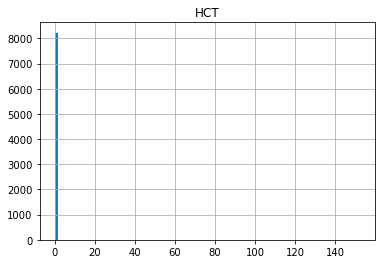

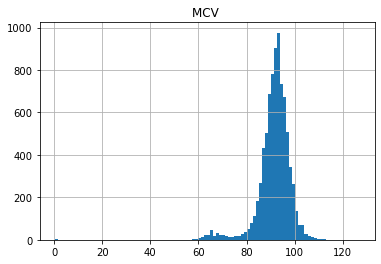

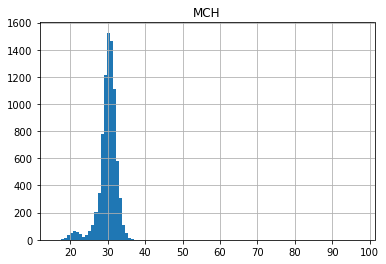

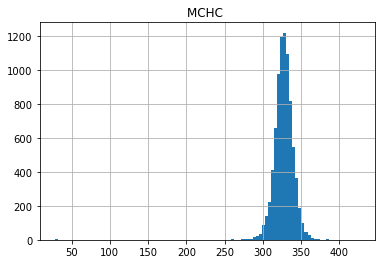

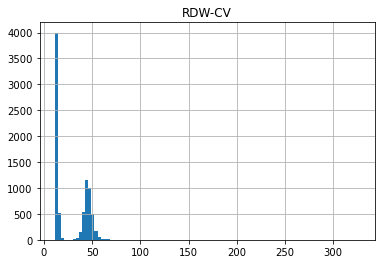

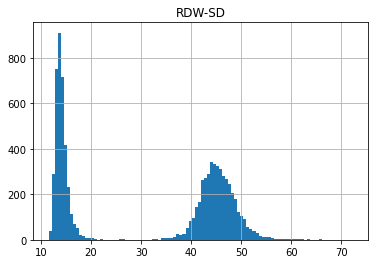

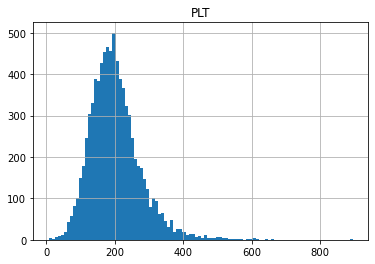

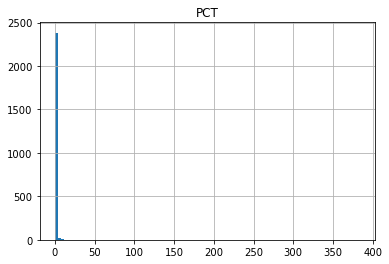

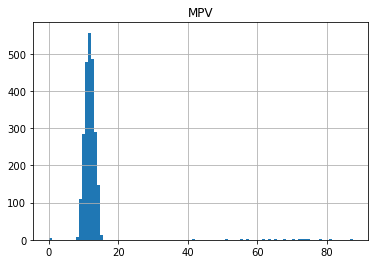

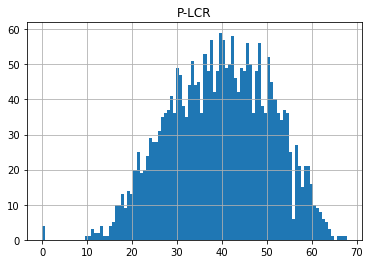

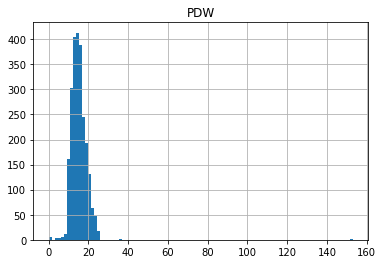

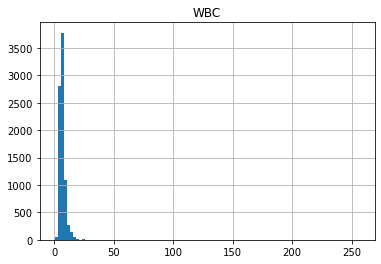

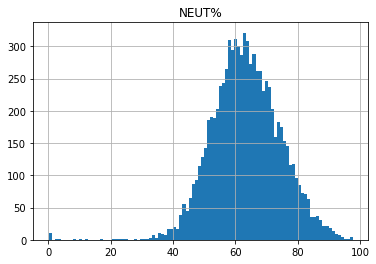

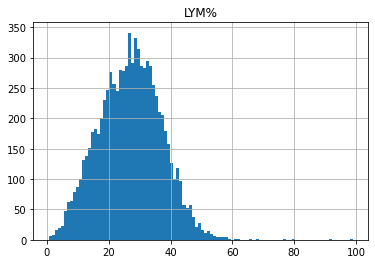

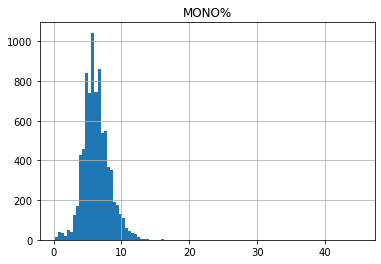

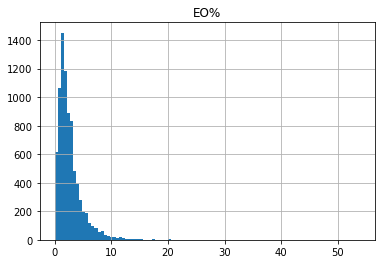

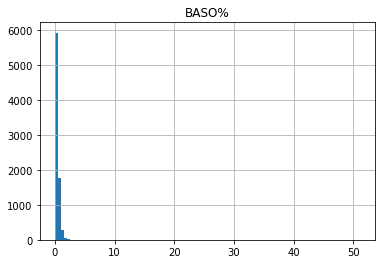

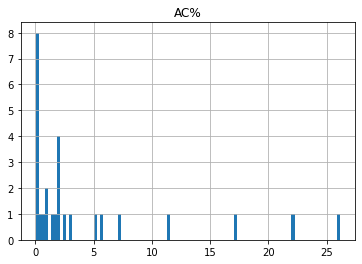

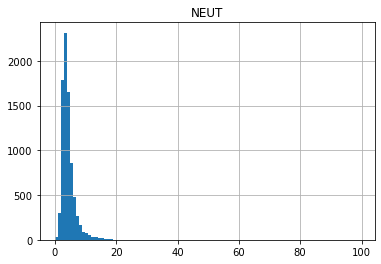

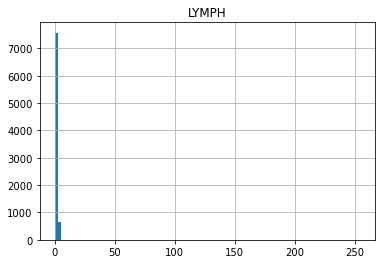

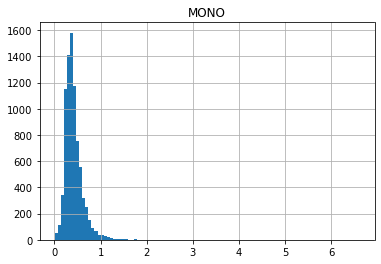

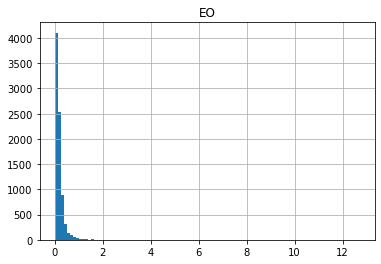

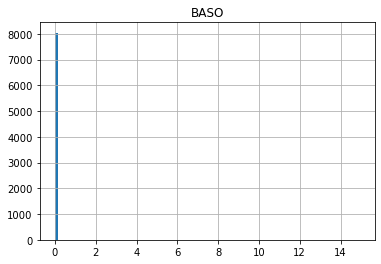

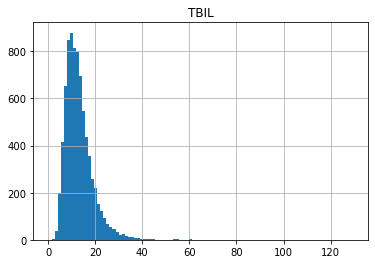

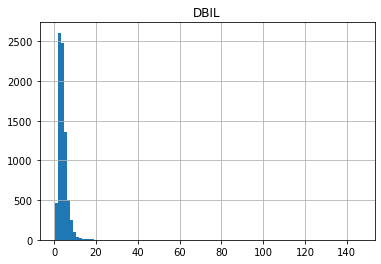

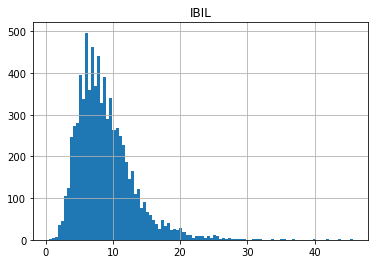

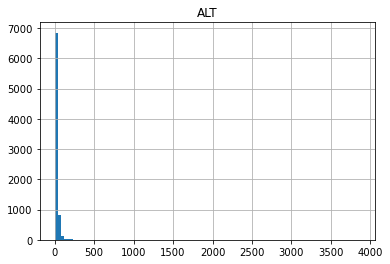

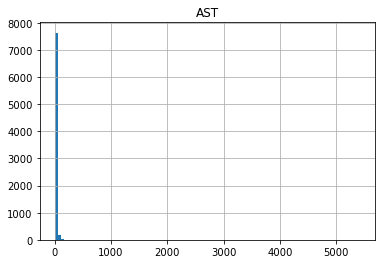

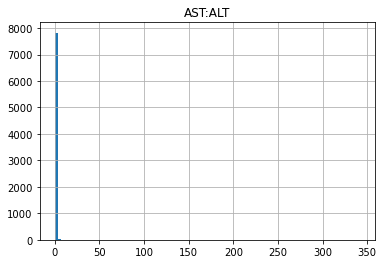

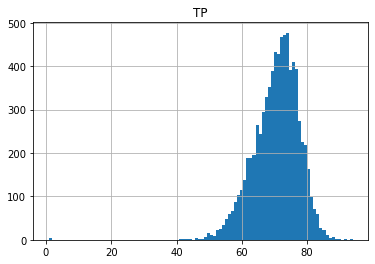

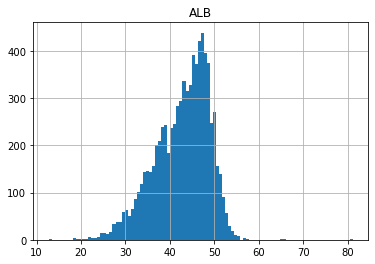

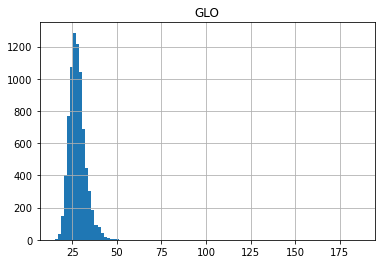

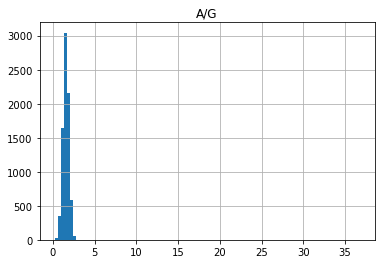

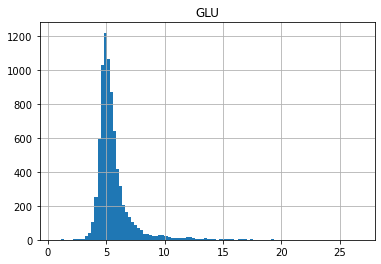

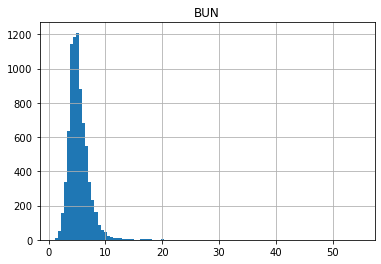

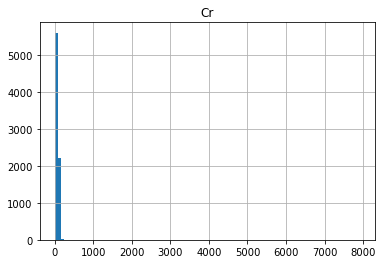

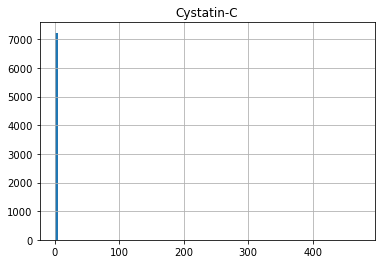

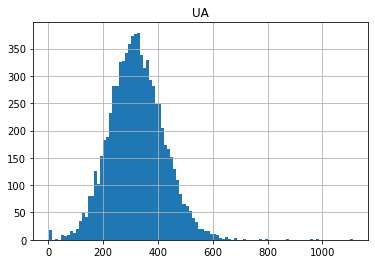

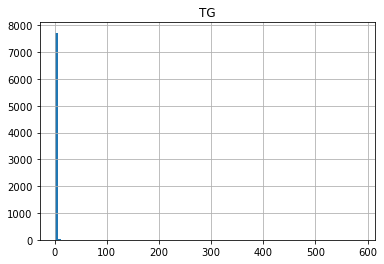

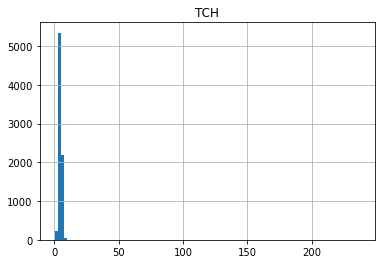

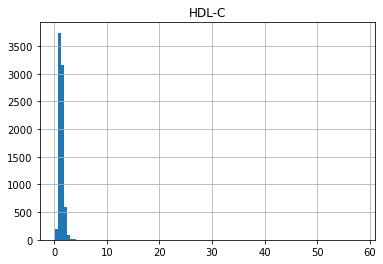

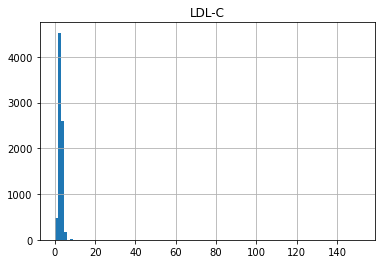

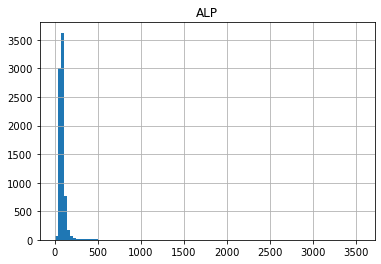

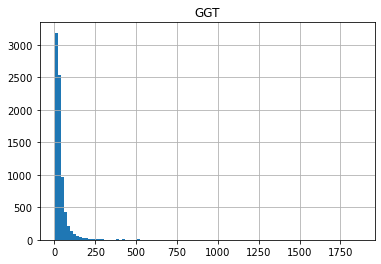

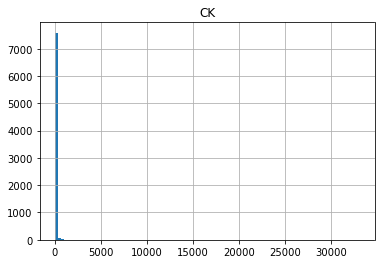

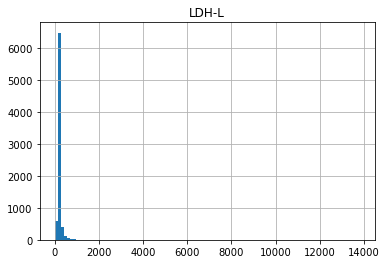

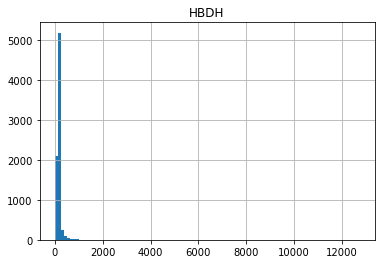

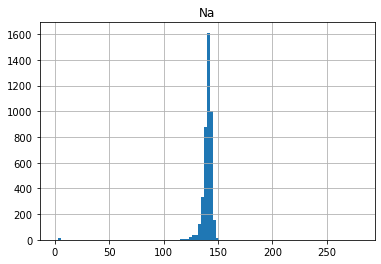

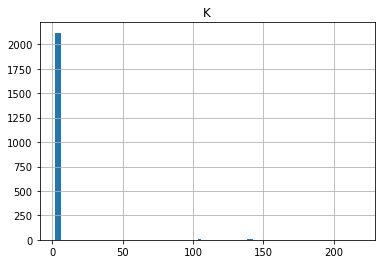

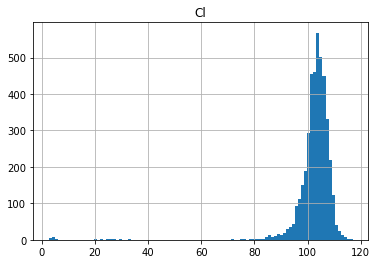

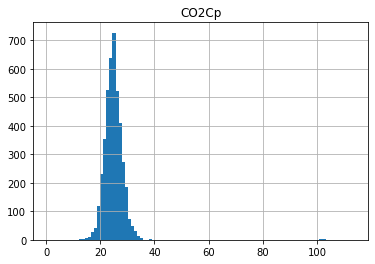

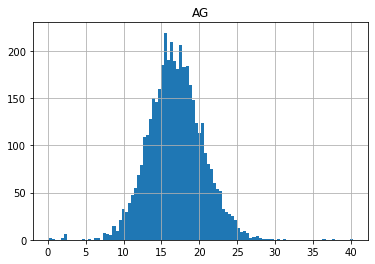

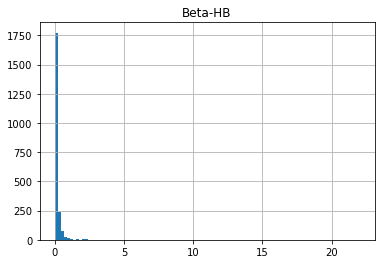

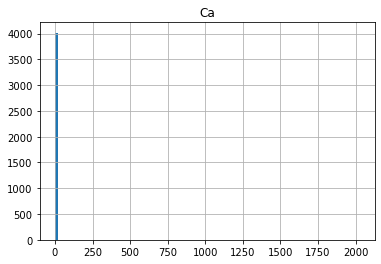

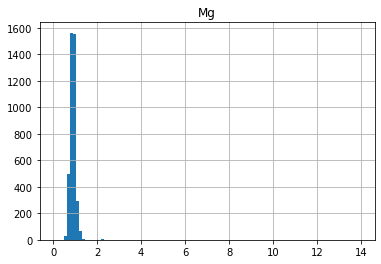

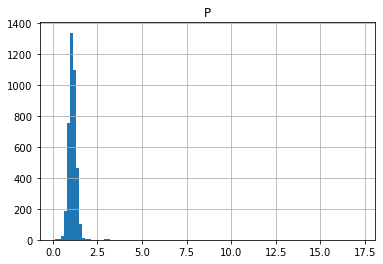

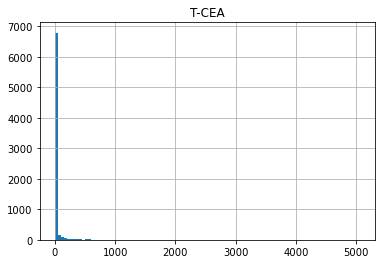

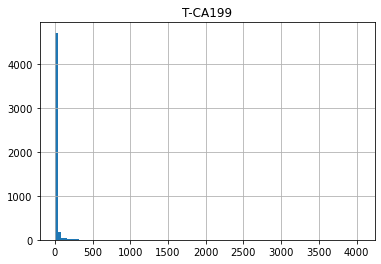

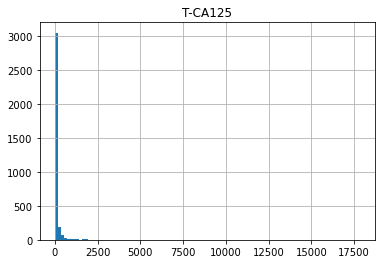

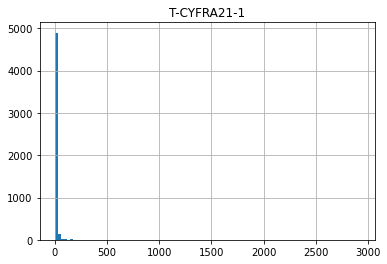

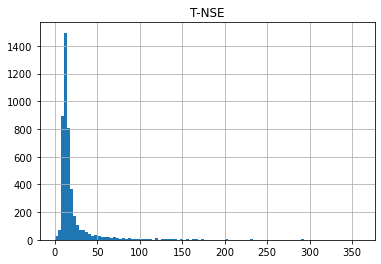

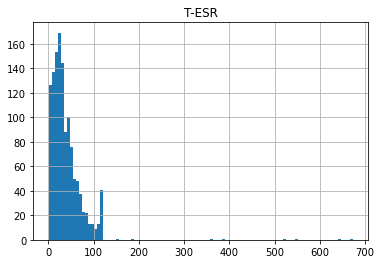

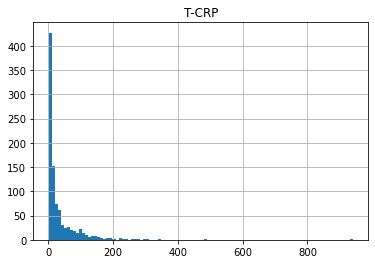

In [3]:
for i in cancer_data2.columns:
    cancer_data2[i].hist(bins=100)
    plt.title(i)
    plt.show()

In [83]:
def scren_nan(df, row, column):
    
    
    # keep the left part
    samples_nan_rate = dict(df.isnull().sum(axis=1)/df.shape[1] < row)
    features_nan_rate = dict(df.isnull().sum(axis=0)/df.shape[0] < column)
    
    samples_to_select = [k for k, v in samples_nan_rate.items() if str(v)=="True"]
    features_to_select = [k for k, v in features_nan_rate.items() if str(v)=="True"]
    
    return df.T[samples_to_select].T[features_to_select]

In [96]:
group_a = scren_nan(cancer_data2[cancer_data2['A=Case, B=Control'] == 'A'], row = 0.2, column = 0.4)
group_b = scren_nan(cancer_data2[cancer_data2['A=Case, B=Control'] == 'B'], row = 0.2, column = 0.4)

In [97]:
group_a

,"A=Case, B=Control",Origin,A=male B=female,Age,Pattern,Smoke,RBC,HGB,HCT,MCV,...,Na,K,Cl,CO2Cp,AG,Ca,Mg,P,T-CEA,T-CYFRA21-1
ID,,,,,,,,,,,,,,,,,,,,,
1,A,A,B,41,A,0,3.78,122,0.37,96.6,...,141.2,3.85,107.6,23.7,13.8,2.16,0.9,1.19,NaN,NaN
2,A,A,A,72,A,0,3.9,124,0.37,95.4,...,136.3,2.92,101.3,29.2,8.7,2.15,0.62,0.99,55.53,6.02
3,A,A,B,79,B,1200,3.86,121,0.37,96.6,...,135.3,4.46,103.9,23.7,12.2,2.21,0.94,0.9,4.22,40.11
4,A,A,B,52,C,0,4.72,134,0.4,85.4,...,139.2,2.76,97.7,28.3,16,2.18,0.84,1.09,73.5,26.75
5,A,A,A,72,A,600,4.31,132,0.41,94.4,...,143.1,3.85,109,23.4,14.6,2.07,1.1,0.87,7.19,6.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022320,A,B,B,45,A,0,4.47,135,0.4,89.5,...,138.7,4.78,102.4,22.1,19,2.01,0.76,1.19,1.07,0.7
2278932,A,B,B,68,A,0,4.6,146,0.43,92.4,...,143.3,4.3,104.2,24.9,18.5,2.3,0.85,1.34,1.34,NaN
2317739,A,B,B,67,A,0,4.62,147,0.44,94.8,...,143.9,4.37,103.2,22.3,22.8,2.37,0.96,1.32,2.39,2.67


In [98]:
group_b

,"A=Case, B=Control",Origin,A=male B=female,Age,Smoke,RBC,HGB,HCT,MCV,MCH,...,TCH,HDL-C,LDL-C,ALP,GGT,CK,LDH-L,HBDH,T-CEA,T-CA199
ID,,,,,,,,,,,,,,,,,,,,,
509610,B,C,B,59,25,5.03,147,0.47,92.8,29.2,...,5.39,1.83,2.88,71,28,129,273,232,3.88,23.2
1914027,B,C,B,45,25,4.74,118,0.38,80.4,24.9,...,5.66,1.78,3.52,54,17,81,138,109,1.34,NaN
2042229,B,C,A,62,0,5.44,172,0.52,94.7,31.6,...,6.09,1.57,3.93,73,49,37,153,120,4.85,10.3
2044242,B,C,A,71,0,3.94,136,0.41,103.3,34.5,...,5.59,1.63,3.51,84,45,156,183,144,4.58,NaN
2045482,B,C,A,59,25,5.1,158,0.47,92,31,...,3.93,0.91,2.01,74,84,153,171,133,5.01,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2481368,B,C,A,63,100,5.16,170,0.51,98.6,32.9,...,7.58,1.38,5.64,73,60,35,179,147,2.77,NaN
2484289,B,C,B,40,25,4.29,144,0.43,99.8,33.6,...,4.18,1.16,2.71,68,24,81,202,158,0.71,11.2
2486261,B,C,A,60,0,5.44,166,0.49,90.8,30.5,...,5.89,1.22,3.71,74,55,96,170,129,0.52,2.7


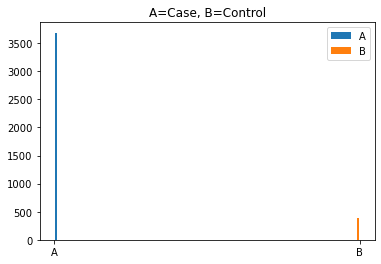

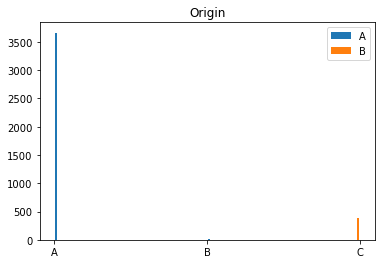

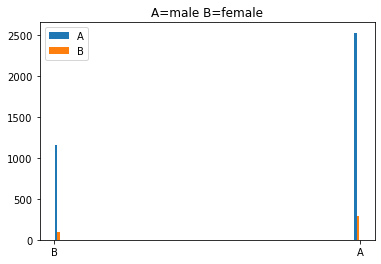

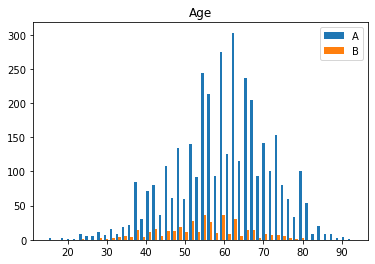

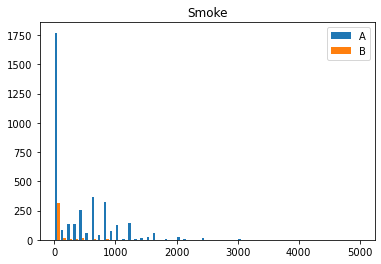

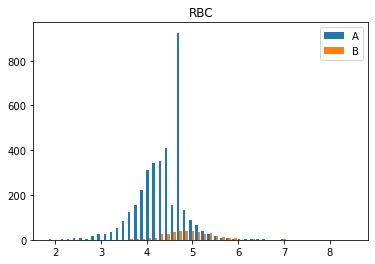

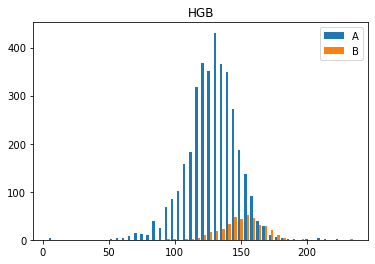

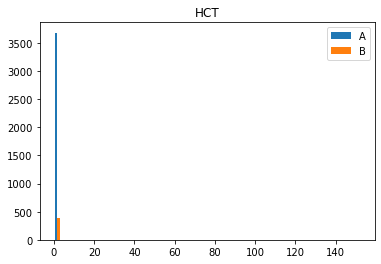

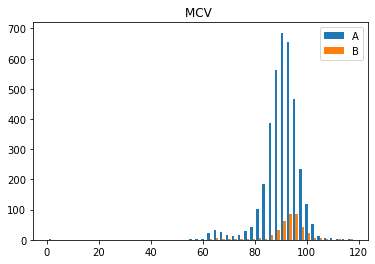

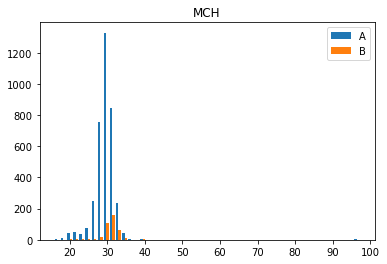

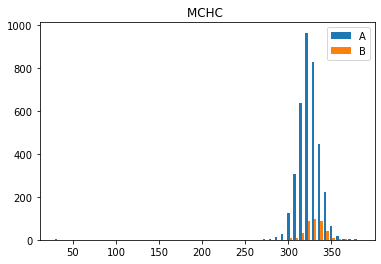

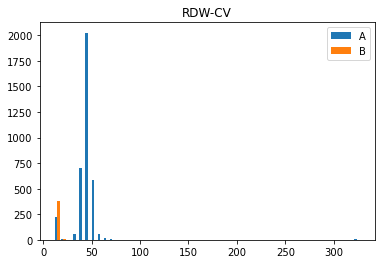

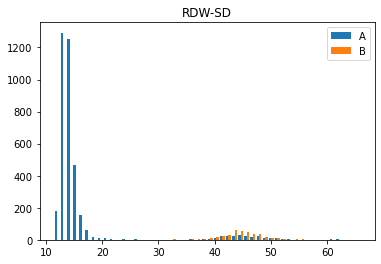

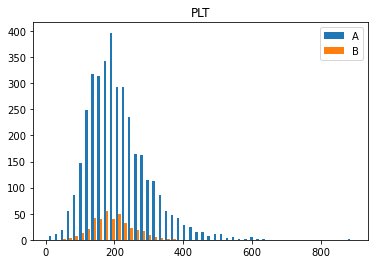

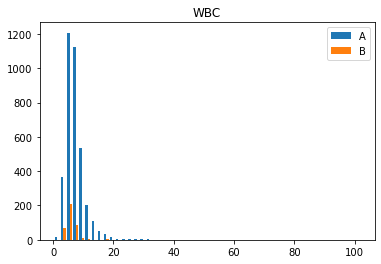

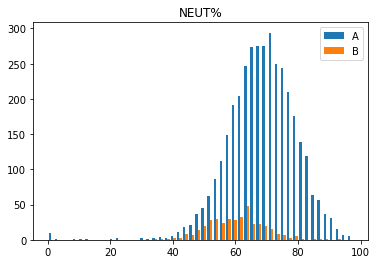

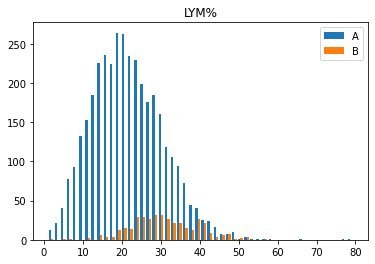

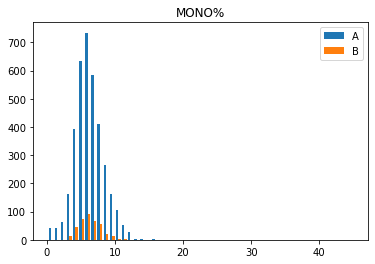

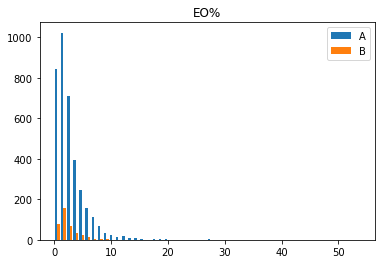

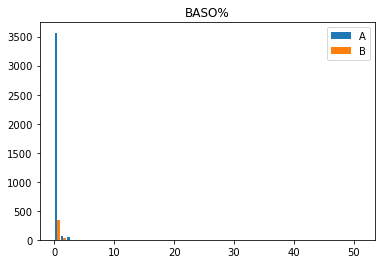

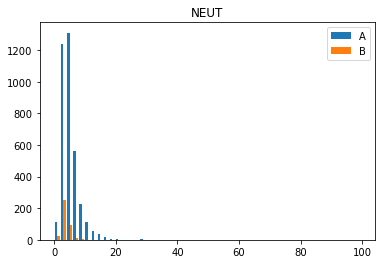

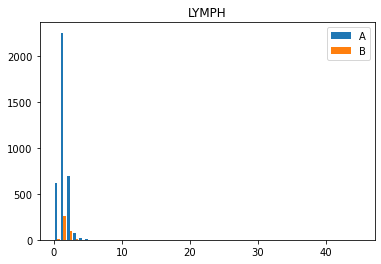

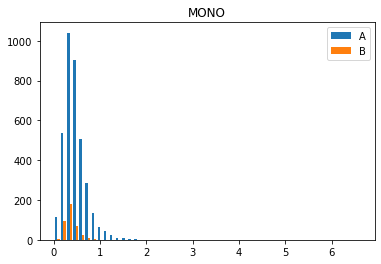

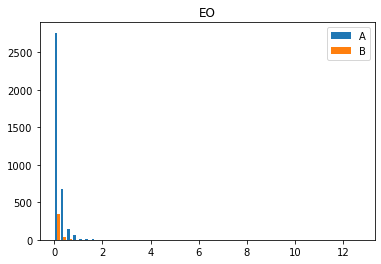

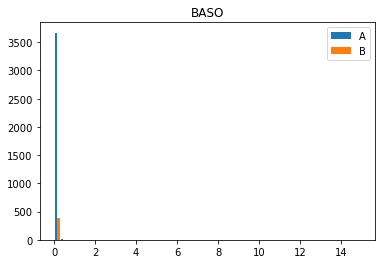

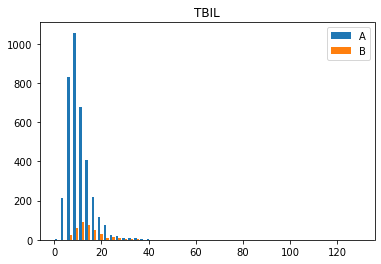

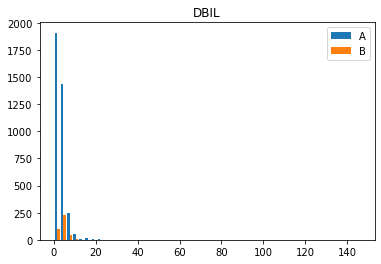

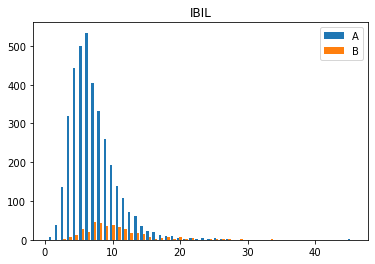

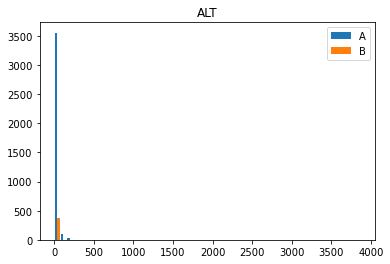

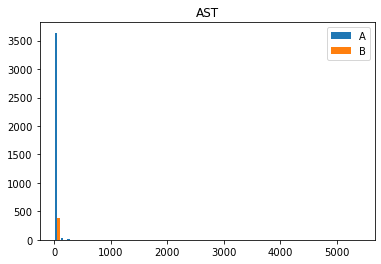

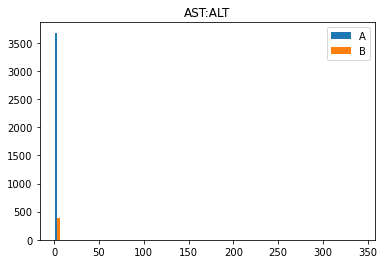

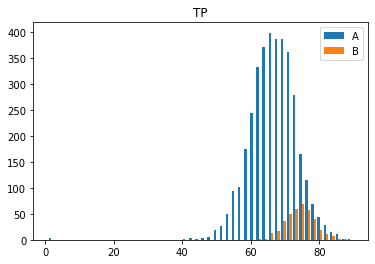

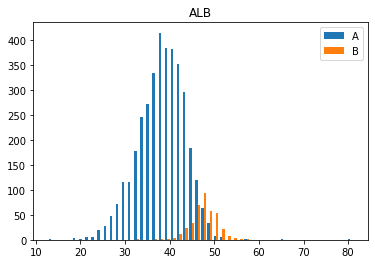

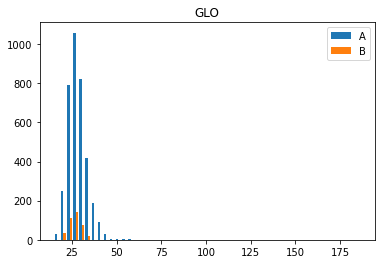

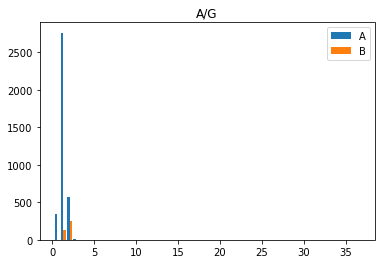

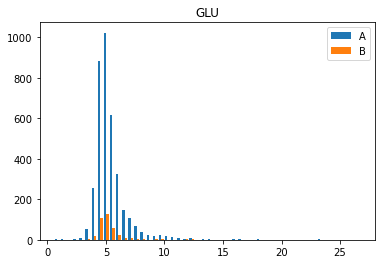

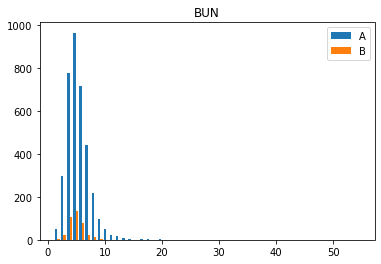

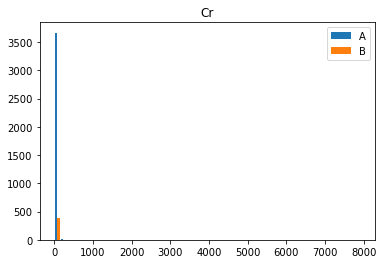

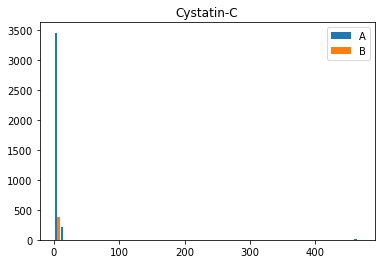

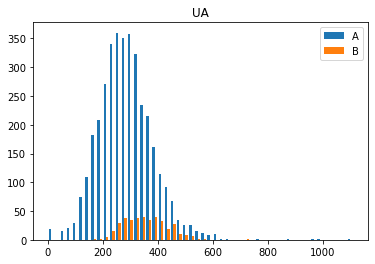

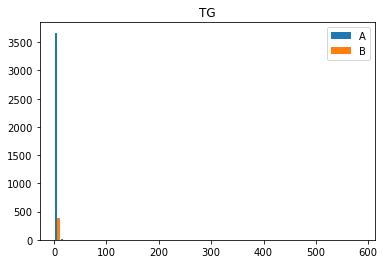

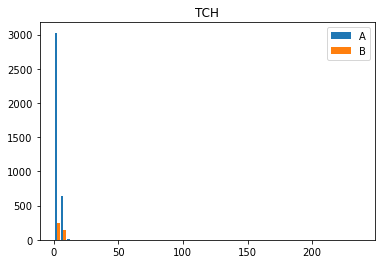

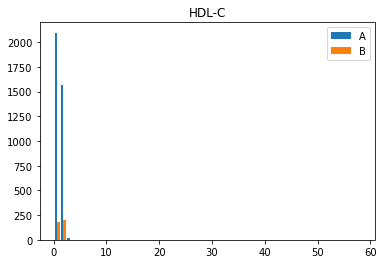

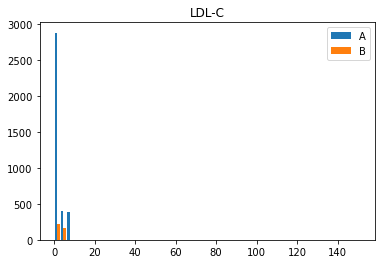

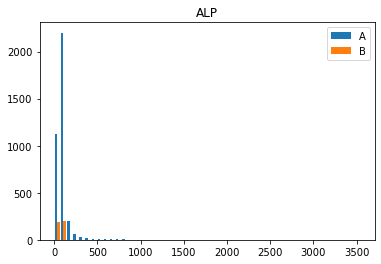

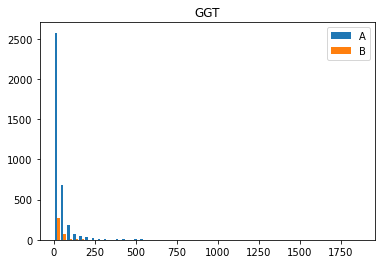

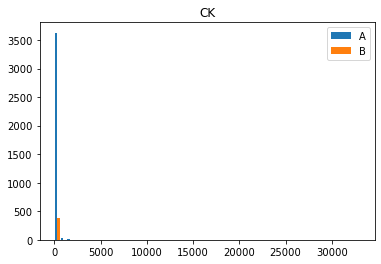

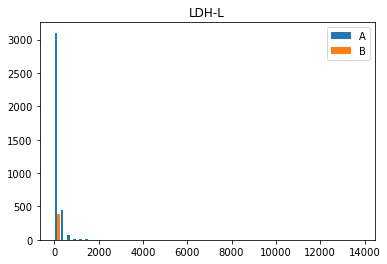

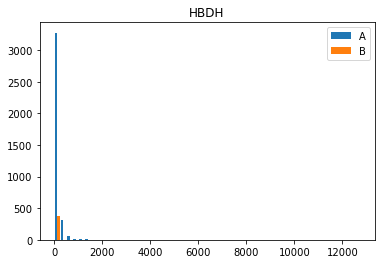

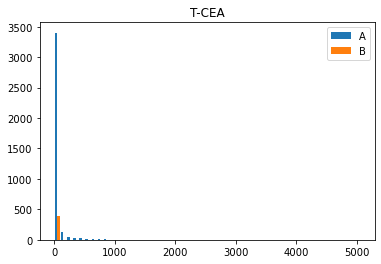

In [101]:
for i in group_a.columns:
    if i in group_b.columns:
        plt.hist([group_a[i], group_b[i]], bins = 50, label=['A','B'])
        plt.title(i)
        plt.legend()
        plt.show()